In [5]:
%matplotlib inline
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
%cd /home/extend2/user7/Hwj/深度学习代码练习/chapter13

/home/extend2/user7/Hwj/深度学习代码练习/chapter13


In [6]:
img = plt.imread('/home/extend2/user7/Hwj/深度学习代码练习/img/catdog.jpg')
h,w = img.shape[:2]


In [7]:
!pwd
%cd /home/extend2/user7/Hwj/深度学习代码练习/chapter13

/home/extend2/user7/Hwj/深度学习代码练习/chapter13
/home/extend2/user7/Hwj/深度学习代码练习/chapter13


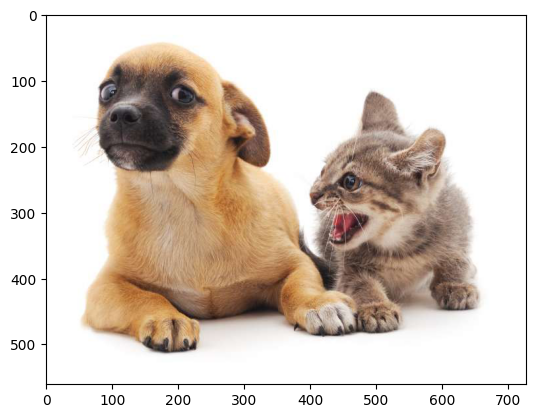

In [8]:
plt.imshow(img)
#plt.axis('off')  # 关闭坐标轴
plt.show()

In [15]:
!pwd

/home/extend2/user7/Hwj/深度学习代码练习/chapter13


In [9]:
def display_anchors(fmap_w,fmap_h,s):
    fmap = torch.zeros((1,10,fmap_h,fmap_w))
    anchors = torch.zeros((fmap_h*fmap_w*len(s),4))
    idx = 0
    for i in range(fmap_h):
        for j in range(fmap_w):
            for size in s:
                anchors[idx,:] = torch.tensor([j,i,j+size,i+size])
                idx+=1
    bbox_scale = torch.tensor((w,h,w,h))
    plt.imshow(img)
    for anchor in anchors:
        rect = plt.Rectangle(
            xy = (anchor[0] * w / fmap_w, anchor[1]*h/fmap_h),
            width = (anchor[2] - anchor[0])*w/fmap_w,
            height = (anchor[3] - anchor[1])*h/fmap_h,
            fill = False,edgecolor = 'red',linewidth = 1
        )
        plt.gca().add_patch(rect)
    plt.show()

In [10]:
def display_anchors(fmap_w, fmap_h, s):
    d2l.set_figsize()
    # 前两个维度上的值不影响输出
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
    bbox_scale = torch.tensor((w, h, w, h))
    d2l.show_bboxes(d2l.plt.imshow(img).axes,
                    anchors[0] * bbox_scale)

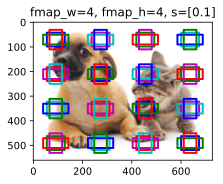

In [22]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.1])
plt.title(f'fmap_w=4, fmap_h=4, s=[0.1]')
plt.savefig('anchors2.png')

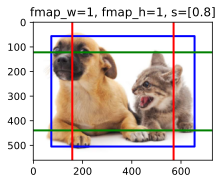

In [23]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])
plt.title(f'fmap_w=1, fmap_h=1, s=[0.8]')
plt.savefig('anchors1.png')

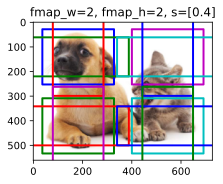

In [24]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])
plt.title(f'fmap_w=2, fmap_h=2, s=[0.4]')
plt.savefig('anchors3.png')

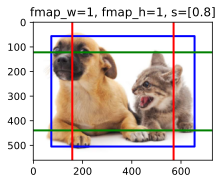

In [25]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])
plt.title(f'fmap_w=1, fmap_h=1, s=[0.8]')
plt.savefig('anchors4.png')